In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
# importation des données
df = pd.read_csv("Modified_SQL_Dataset.csv")
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (30919, 2)


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [ ]:
X = df['Query']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(30919,) (30919,)
Dataset Input: 
 0                    " or pg_sleep  (  __TIME__  )  --
1    create user name identified by pass123 tempora...
2     AND 1  =  utl_inaddr.get_host_address   (    ...
3     select * from users where id  =  '1' or @ @1 ...
4     select * from users where id  =  1 or 1#"  ( ...
Name: Query, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24735, 6594)
(24735,)
(6184, 6594)
(6184,)


In [ ]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

In [ ]:
# LOGISTIC REGRESSION
import time
lr_clf = LogisticRegression()

t0 = time.time()
y_pred_lr = lr_clf.fit(X_train, y_train)
print(f"Temps d’apprentissage : {time.time() - t0}")
t1 = time.time()
y_pred = y_pred_lr.predict(X_test)
print(f"Temps de prédiction : {time.time() - t1}")

print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Temps d’apprentissage : 31.29499053955078
Temps de prédiction : 0.2139124870300293
Accuracy of Logistic Regression on test set : 0.9391979301423027
F1 Score of Logistic Regression on test set : 0.9112789051439358


In [ ]:
# RANDOM FOREST
import time
rf_clf = RandomForestClassifier()
t0 = time.time()
rf_clf.fit(X_train, y_train)
print(f"Temps d’apprentissage : {time.time() - t0}")
t1 = time.time()
y_pred = rf_clf.predict(X_test)
print(f"Temps de prédiction : {time.time() - t1}")

print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Temps d’apprentissage : 334.624715089798
Temps de prédiction : 2.652092695236206
Accuracy of Random Forest on test set : 0.9301423027166882
F1 Score of Random Forest on test set : 0.9029649595687331


In [ ]:
# SUPPORT VECTOR MACHINES
import time
svm_clf = SVC(gamma = 'auto')
t0 = time.time()
svm_clf.fit(X_train, y_train)
print(f"Temps d’apprentissage : {time.time() - t0}")
t1 = time.time()
y_pred = svm_clf.predict(X_test)
print(f"Temps de prédiction : {time.time() - t1}")

print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Temps d’apprentissage : 2579.525183916092
Temps de prédiction : 762.2949862480164
Accuracy of SVM on test set : 0.7571151358344114
F1 Score of SVM on test set : 0.5036351619299405


In [ ]:
# NAIVE BAYES
import time
nb_clf = GaussianNB()

t0 = time.time()
nb_clf.fit(X_train, y_train)
print(f"Temps d’apprentissage : {time.time() - t0}")
t1 = time.time()
y_pred = nb_clf.predict(X_test)

print(f"Temps de prédiction : {time.time() - t1}")
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Temps d’apprentissage : 3.4235172271728516
Temps de prédiction : 0.8380327224731445
Accuracy of Naive Bayes on test set : 0.8185640362225097
F1 Score of Naive Bayes on test set : 0.7999286733238231


In [ ]:
# DECISION TREES
import time
DT = tree.DecisionTreeClassifier()

t0 = time.time()
DT.fit(X_train, y_train)
print(f"Temps d’apprentissage : {time.time() - t0}")
t1 = time.time()
y_pred = DT.predict(X_test)

print(f"Temps de prédiction : {time.time() - t1}")
print(f"Accuracy of Decision Tree on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Decision Tree on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Temps d’apprentissage : 250.25662302970886
Temps de prédiction : 0.13302397727966309
Accuracy of Decision Tree on test set : 0.9186610608020699
F1 Score of Decision Tree on test set : 0.8890848952590958


In [ ]:
# CONVOLUTIONAL NEURAL NETWORK
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [ ]:
import time

model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,6594)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 6594)
X_test1 = X_test.reshape(-1, 1, 6594)
t0 = time.time()
history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))
print(f"Temps d’apprentissage : {time.time() - t0}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             211040    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 212,129
Trainable params: 212,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
773/773 [==============================] - 9s 10ms/step - loss: 0.1793 - accuracy: 0.9353 - val_loss: 0.0978 - val_accuracy: 0.9664
Epoch 2/10
773/773 [===================

In [ ]:
import time

t1 = time.time()
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)

print(f"Temps de prédiction : {time.time() - t1}")
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)

194/194 [==============================] - 1s 5ms/step
Temps de prédiction : 2.468261480331421
Accuracy of CNN on test set : 0.9641009055627425
F1 Score of CNN on test set : 0.9498191681735986


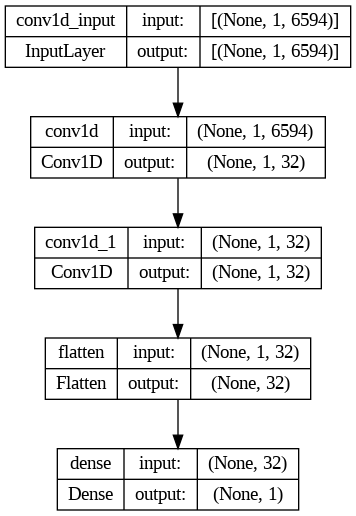

In [ ]:
plot_model(model, show_shapes=True, to_file='CNN.png')

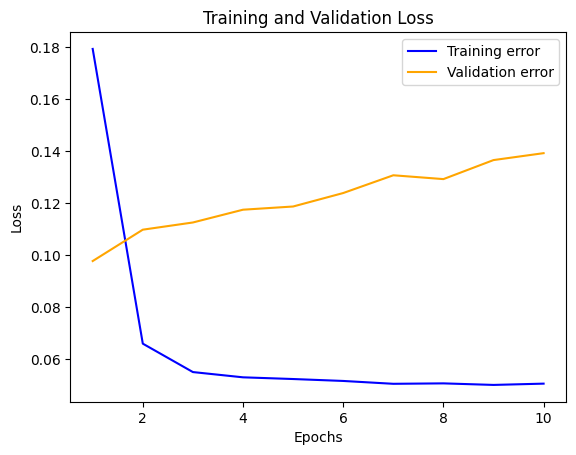

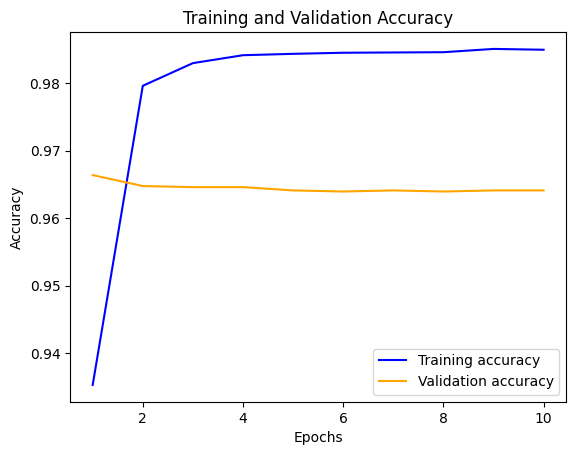

In [ ]:
# Plots loss over epochs
plot_history(history)
plot_historyAcc(history)

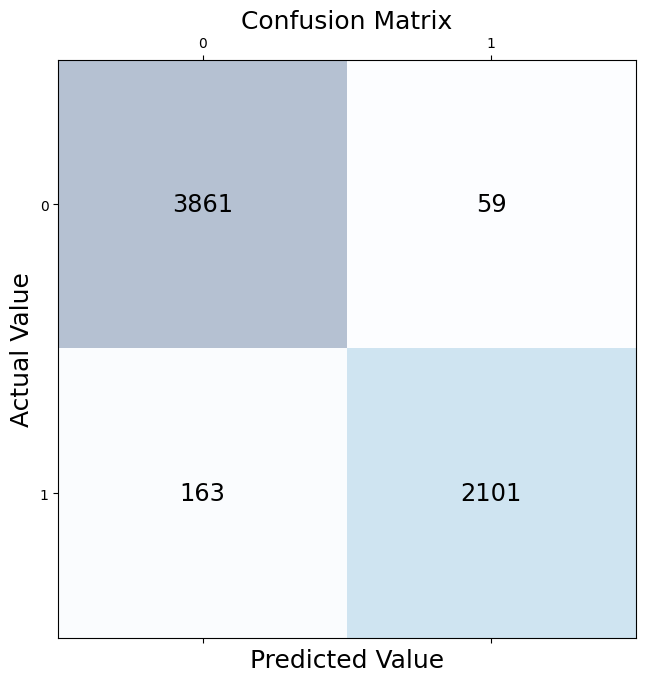

               precision    recall  f1-score   support

Non-Intrusion       0.96      0.98      0.97      3920
    Intrusion       0.97      0.93      0.95      2264

     accuracy                           0.96      6184
    macro avg       0.97      0.96      0.96      6184
 weighted avg       0.96      0.96      0.96      6184



In [ ]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_model)
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

In [ ]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,CNN
F1_Score,0.911279,0.902965,0.503635,0.799929,0.889085,0.949819
Precision,0.852915,0.887809,0.336572,0.990724,0.890459,0.928004
Recall,0.978217,0.918647,1.000000,0.670754,0.887715,0.972685
Accuracy,0.939198,0.930142,0.757115,0.818564,0.918661,0.964101


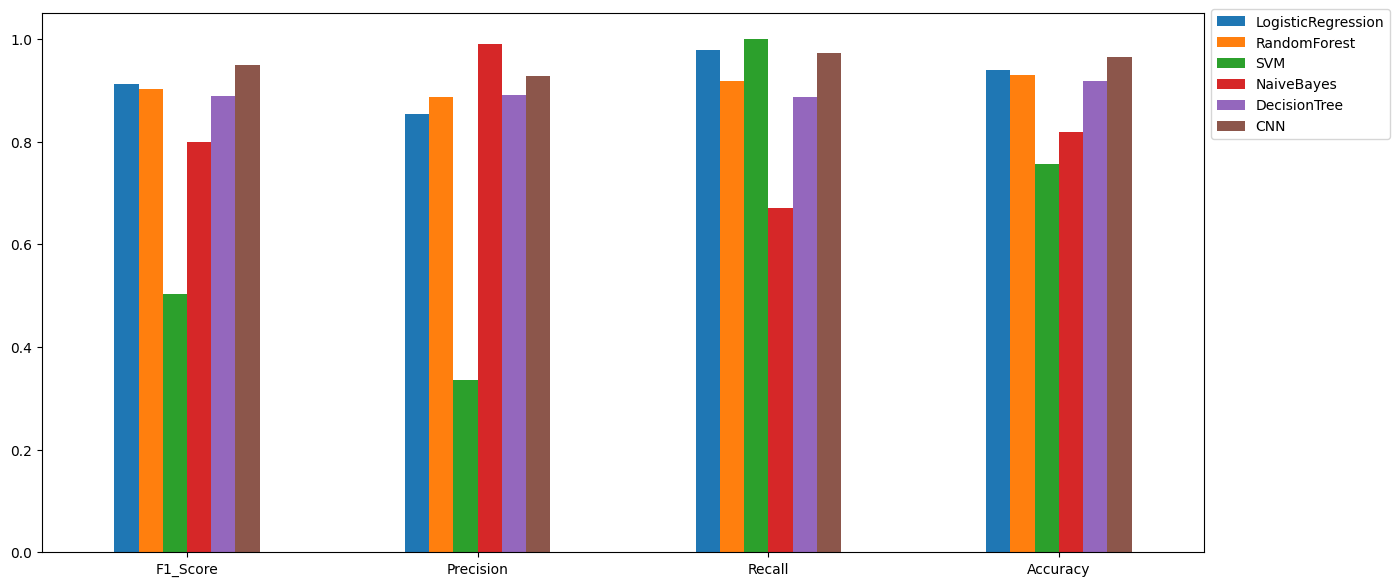

In [ ]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');